<a href="https://colab.research.google.com/github/kemontz/Pengolahan_Citra_digital/blob/main/Gausian_High%26Low_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

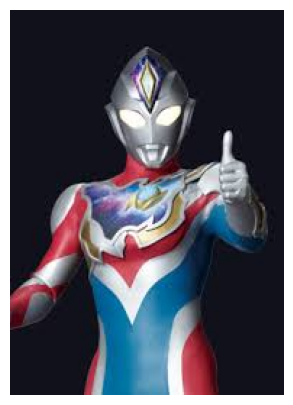

In [62]:
# libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# open the image f

Dandi = cv2.imread('ultraman.jpeg')

Dandi2 = cv2.cvtColor(Dandi, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5,5))
plt.imshow(Dandi2)
plt.axis('off')
plt.show()




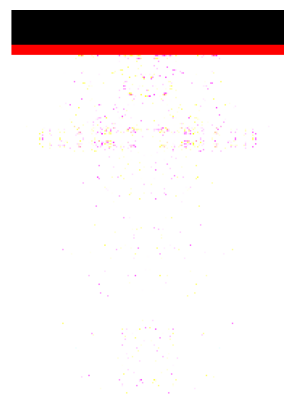

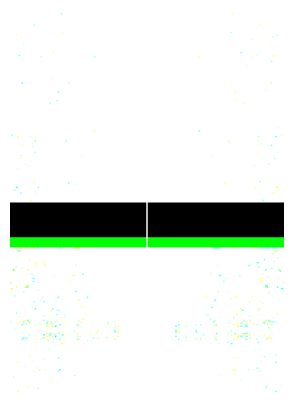

In [82]:
# transform the image into frequency domain, f --> F
F = np.fft.fft2(Dandi)
Fshift = np.fft.fftshift(F)

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(F)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Fshift)), cmap='gray')
plt.axis('off')
plt.show()


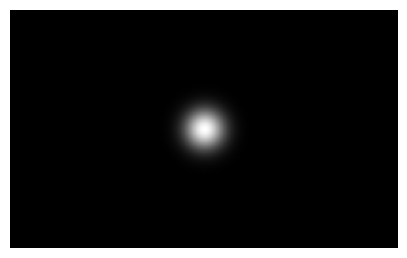

In [73]:
# Create Gaussin Filter: Low Pass Filter
M,N,_ = f.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 10
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        H[u,v] = np.exp(-D**2/(2*D0*D0))

plt.figure(figsize=(5,5))
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

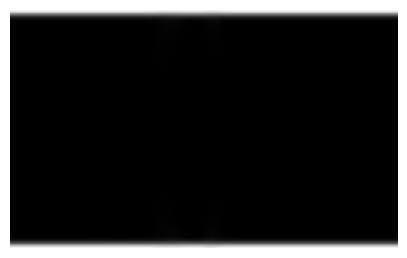

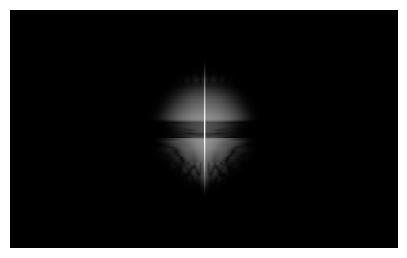

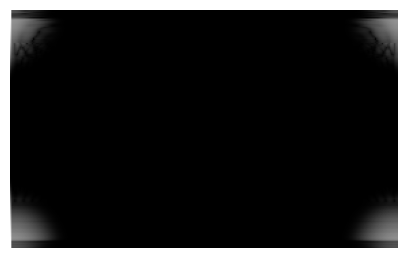

In [75]:
# Image Filters
# Convert Fshift to grayscale if it has 3 channels
if Fshift.ndim == 3:
    Fshift = np.mean(Fshift, axis=2)  # Average across color channels to get grayscale

Gshift = Fshift * H  # Now the shapes should be compatible
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.figure(figsize=(5,5))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Gshift)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(G)), cmap='gray')
plt.axis('off')
plt.show()


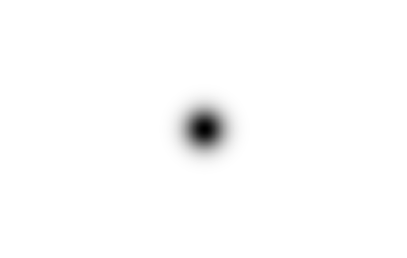

In [76]:
# Gaussian: High pass filter
HPF = 1 - H

plt.figure(figsize=(5,5))
plt.imshow(HPF, cmap='gray')
plt.axis('off')
plt.show()


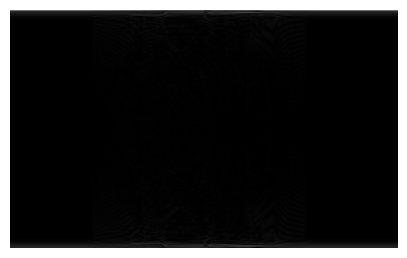

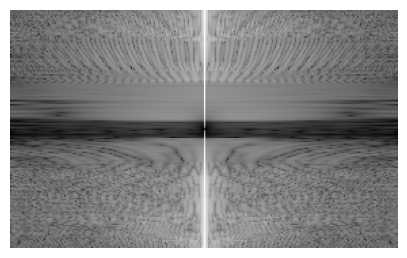

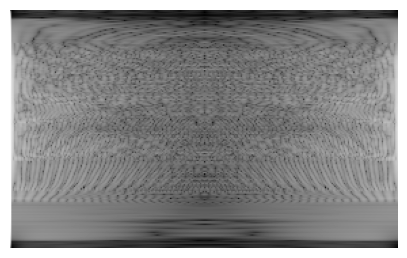

In [77]:
# Image Filters
Gshift = Fshift * HPF
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.figure(figsize=(5,5))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Gshift)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(G)), cmap='gray')
plt.axis('off')
plt.show()


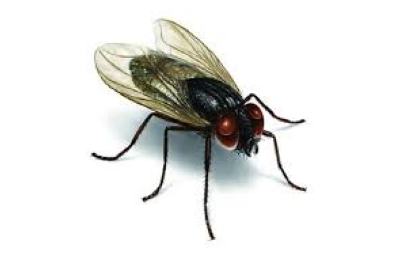

In [80]:
# Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# open the image

f = cv2.imread('lalat.jpeg')

f2 = cv2.cvtColor(f, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5,5))
plt.imshow(f2)
plt.axis('off')
plt.show()

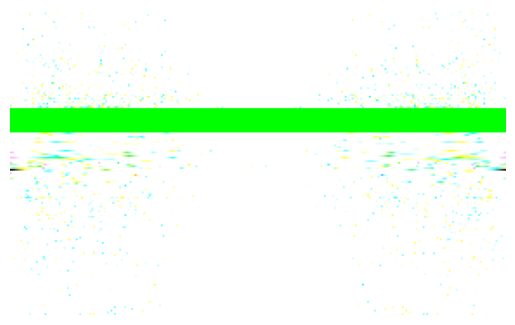

In [81]:
F = np.fft.fft2(f)
Fshift = np.fft.fftshift(F)

plt.imshow(np.log1p(np.abs(Fshift)), cmap='gray')
plt.axis('off')
plt.show()


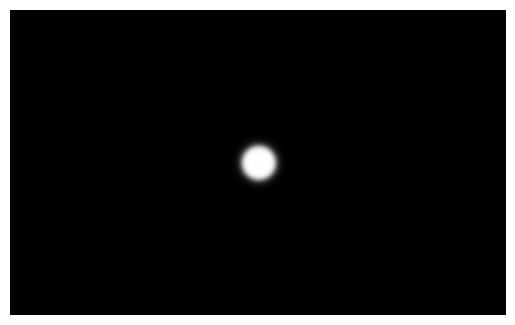

In [98]:
# Butterwort Low Pass Filter
M,N, O = f.shape
H = np.zeros((M,N,O), dtype=np.float32)
D0 = 10 # cut of frequency
n = 10 # order
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        H[u,v] = 1 / (1 + (D/D0)**n)

plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

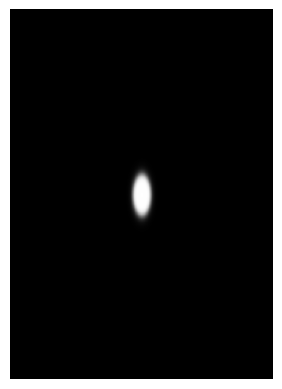

In [100]:
# Butterwort Low Pass Filter
M,N, O = f.shape # Get shape from f
H = np.zeros((M,N,O), dtype=np.float32) # Same shape
D0 = 10 # cut of frequency
n = 10 # order
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        H[u,v] = 1 / (1 + (D/D0)**n) # create the Butterworth filter

# Ensure H has the same shape as Fshift before applying the filter
H = cv2.resize(H, (Fshift.shape[1], Fshift.shape[0]))

plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

<ipython-input-101-f695d42b5314>:8: RuntimeWarning: divide by zero encountered in scalar divide
  HPF[u,v] = 1 / (1 + (D0/D)**n)


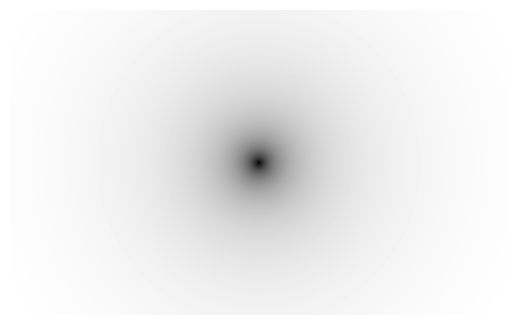

In [101]:
# Butterworth High Pass Filter
HPF = np.zeros((M,N), dtype=np.float32)
D0 = 10
n = 1
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        HPF[u,v] = 1 / (1 + (D0/D)**n)

plt.imshow(HPF, cmap='gray')
plt.axis('off')
plt.show()

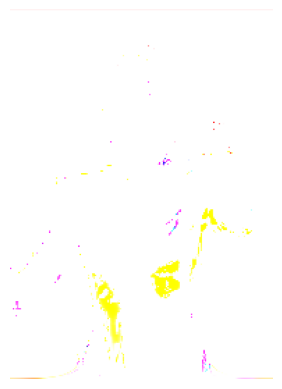

In [103]:
# frequency domain image filters
# Resize HPF to match the first two dimensions of Fshift
HPF_resized = cv2.resize(HPF, (Fshift.shape[1], Fshift.shape[0]))

# Apply the filter to each color channel separately
Gshift = np.zeros_like(Fshift, dtype=complex) # Initialize Gshift with complex data type
for i in range(Fshift.shape[2]):
    Gshift[:,:,i] = Fshift[:,:,i] * HPF_resized

G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

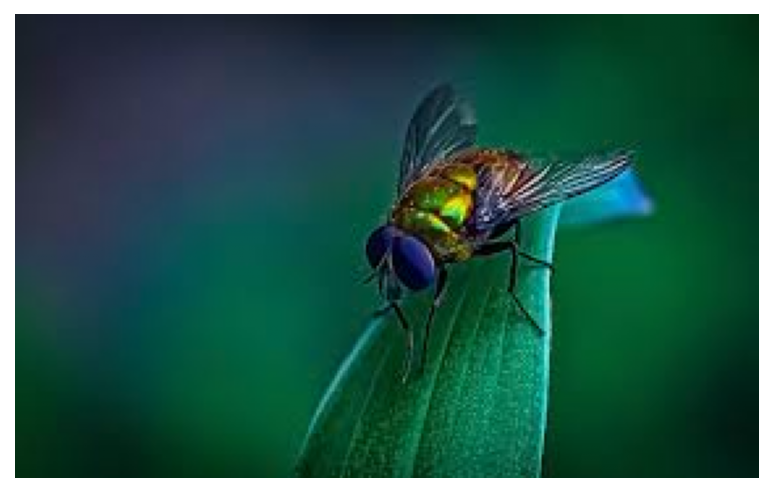

In [106]:
# Frequency domain filter: Laplacian filer
import cv2
import numpy as np
import matplotlib.pyplot as plt

# open and normalized the image
f = cv2.imread('lalat2.jpeg')
f = f / 255

plt.figure(dpi=150)
plt.imshow(f, cmap='gray')
plt.axis('off')
plt.show()

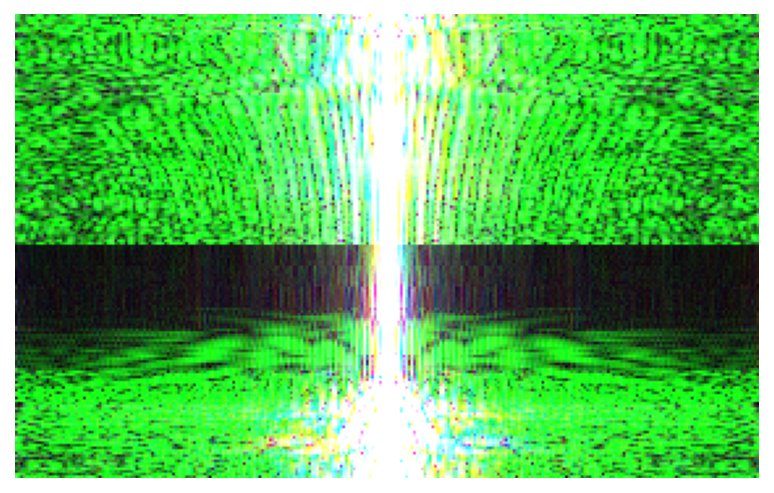

In [107]:
# transform into frequency domain
F = np.fft.fftshift(np.fft.fft2(f))

plt.figure(dpi=150)
plt.imshow(np.log1p(np.abs(F)), cmap='gray')
plt.axis('off')
plt.show()


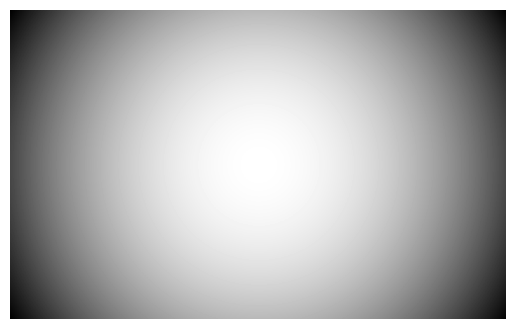

In [111]:
# Laplacian Filter
P, Q, _ = F.shape  # Unpack the first two dimensions into P and Q, ignoring the third
H = np.zeros((P, Q), dtype=np.float32)  # Use P and Q to create the H array
for u in range(P):
    for v in range(Q):
        H[u, v] = -4 * np.pi * np.pi * ((u - P / 2)**2 + (v - Q / 2)**2)

plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

In [114]:
# Laplacian image
# Reshape H to have an extra dimension for color channels,
# effectively replicating the filter for each channel
H = H[..., np.newaxis]

# Now H has shape (177, 284, 1), and broadcasting will work
Lap = H * F
Lap = np.fft.ifftshift(Lap)
Lap = np.real(np.fft.ifft2(Lap))

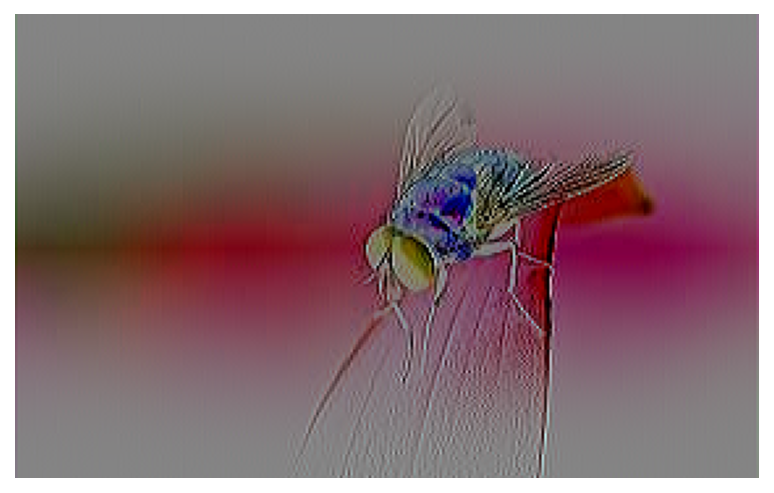

In [115]:
# convert the Laplacian Image value into range [-1,1]
OldRange = np.max(Lap) - np.min(Lap)
NewRange = 1 - -1
LapScaled = (((Lap - np.min(Lap)) * NewRange) / OldRange) + -1

plt.figure(dpi=150)
plt.imshow(LapScaled, cmap='gray')
plt.axis('off')
plt.show()

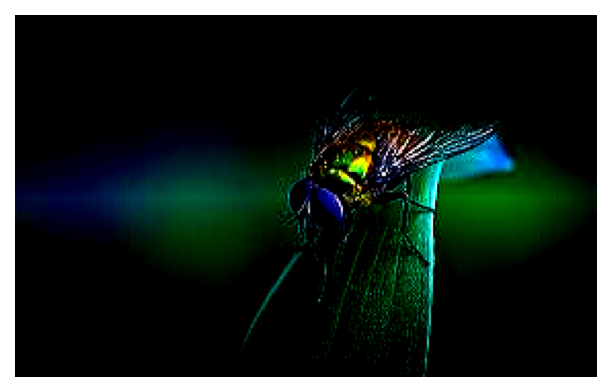

In [116]:
# image ehancement
c = -1
g = f + c*LapScaled
g = np.clip(g, 0, 1)

plt.figure(figsize=(5,7),dpi=150)
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()